In [32]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import os
from dotenv import load_dotenv
from fredapi import Fred


## TAKS 3. Exploiting Correlation

### 3.a. Generate 5 uncorrelated Gaussian random variables that simulate yield changes (they can be positive or negative with a mean close to 0 and a standard deviation that is small).

To generate 5 uncorrelated Gaussian random variables we use `numpy.random.randn()`. We choose mean = 0.001 and std = 0.1 to meet the requirements. Let's simulate a daily yield change over a 6 month period (180 days) to match with section 3.e.


In [33]:
# Parameters
n_samples = 180
n_assets = 5
mean = 0.001
std = 0.1

# Generate yield changes
yield_changes1 = np.random.randn(n_samples, n_assets) * std + mean

# Create a dataframe
yield_changes_df1 = pd.DataFrame(yield_changes1, columns=[f'asset_{i}' for i in range(n_assets)])
yield_changes_df1.head()


,asset_0,asset_1,asset_2,asset_3,asset_4
0,-0.013251,0.019069,0.002937,-0.099223,0.071557
1,0.072058,-0.115240,0.193561,0.073089,-0.076528
2,-0.024251,0.009179,0.008324,0.223117,0.028966
3,0.025116,-0.084602,-0.157724,0.073849,0.004526
4,-0.054625,0.073218,0.103792,-0.039028,0.121360


In [34]:
# Get some statistics from the dataframe
yield_changes_df1.describe()

,asset_0,asset_1,asset_2,asset_3,asset_4
count,180.000000,180.000000,180.000000,180.000000,180.000000
mean,0.009071,-0.001485,-0.003962,0.008021,0.008713
std,0.099502,0.095696,0.104690,0.105891,0.101276
min,-0.286603,-0.224089,-0.347843,-0.289330,-0.226399
25%,-0.054765,-0.070435,-0.070339,-0.059925,-0.055198
50%,0.006760,-0.010638,0.003052,0.015116,0.003912
75%,0.072241,0.052055,0.075080,0.077578,0.072350
max,0.274401,0.266828,0.238260,0.282962,0.307480


### 3.b. Run a Principal Components using EITHER the correlation OR covariance matrix.

Since the data is uncorrelated and they come from the same distribution, we can use covariance matrix to run the PCA.

However, we chose to use the correlation matrix to make the analysis more general. Instead of calculating the correlatin matrix explicitly, we standardize the data (mean = 0 and std = 1) and apply PCA on it. To standaridize the data, we use the `StandardScaler()` class from `sklearn.preprocessing`.

In [35]:
# Instantiate the scaler
scaler1 = StandardScaler()
# Fit and transform the data
scaled_yield_changes1 = scaler1.fit_transform(yield_changes1)
print('Scaled yield changes mean: ', scaled_yield_changes1.mean())
print('Scaled yield changes std: ', scaled_yield_changes1.std())

Scaled yield changes mean:  -3.947459643111668e-17
Scaled yield changes std:  1.0


We can see that scaled_yield_changes1 has a mean close to 0 and a std close to 1. Now we can run the PCA. We do it by using the `PCA()` class from `sklearn.decomposition`. We use `n_components=n_assets` to ensure that the number of principal components is equal to the number of original variables.

In [36]:
# Instantiate the PCA
pca1 = PCA()
# Fit the data
pca_yield_changes1 = pca1.fit(scaled_yield_changes1)


The object `pca_yield_changes1` has been fit to the data and contain information about the principal components. Since Section 3.c asks for the amount of variance explained by each principal component, we can use the `explained_variance_ratio_` and `explained_variance_` attributes of the object.

In [37]:
# Extract explained variance
explained_variance1 = pca_yield_changes1.explained_variance_
explained_variance_ratio1 = pca_yield_changes1.explained_variance_ratio_

print('explained_variance1: ', explained_variance1)
print('explained_variance_ratio1: ', explained_variance_ratio1)

# Percentage of variance explained
variance_explained_perc1 = explained_variance_ratio1 * 100
print("Variance explained by each component:")
for i, var in enumerate(variance_explained_perc1, 1):
    print(f"Component {i}: {var:.2f}%")

explained_variance1:  [1.28099232 1.12558193 0.96872433 0.86044108 0.7921933 ]
explained_variance_ratio1:  [0.25477514 0.22386574 0.19266851 0.17113217 0.15755844]
Variance explained by each component:
Component 1: 25.48%
Component 2: 22.39%
Component 3: 19.27%
Component 4: 17.11%
Component 5: 15.76%


### 3.c. Write a paragraph explaining how the variances of each component compare with each other. In this paragraph, you will address the following question: how much variance is explained by Component 1, Component 2, Component 3?

This section is answered in the report pdf file.

Answer from Grok: In this simulated dataset, the five securities are uncorrelated and have identical variances (standard deviation of 0.01). PCA decomposes the data into five principal components, each representing a direction of variance. Because there’s no correlation, the total variance is evenly distributed across the components. Component 1 explains 21.12%, Component 2 explains 20.54%, and Component 3 explains 19.74%, with the remaining two components similarly close to 20%. The slight variations (e.g., 21.12% vs. 19.28%) arise from random sampling noise in the finite dataset. Ideally, with infinite uncorrelated data of equal variance, each component would explain exactly 20% (100% / 5). This near-equal distribution confirms that no si

### 3.d. Produce a screeplot (see https://en.wikipedia.org/wiki/Scree_plot) of the variance explained for each component.

According to the provided wikipedia page, "a scree plot is a line plot of the eigenvalues of factors or principal components in an analysis" and it "always displays the eigenvalues in a downward curve, ordering the eigenvalues from largest to smallest". The attribute `explained_variance_` of the `PCA` object contains the eigenvalues of the principal components in a descending order. Therefore, to plot the scree plot, we plot the `explained_variance_` against the number of the principal component.

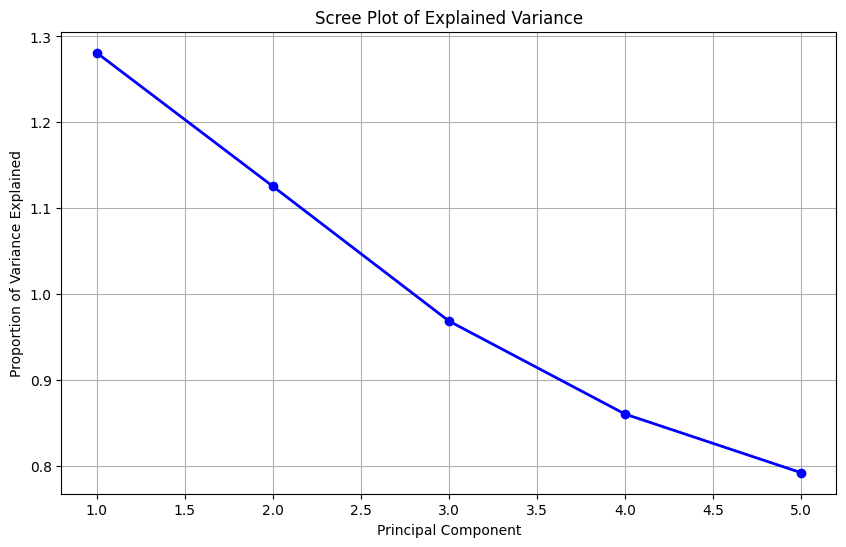

In [38]:
# Create scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance1) + 1), explained_variance1, 'bo-', linewidth=2)
plt.title('Scree Plot of Explained Variance')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.grid(True)
plt.show()


### 3.e. Collect the daily closing yields for 5 government securities, say over 6 months.


**IMPORTANT**: We will leave the inital part of the code of this section commented out so that instructors can use this file to test the code without having to insert their own api key. Below the commented cells, which we used to download and prepare the date, we load the csv file with the yields data.

We are goin to use the FRED API to download the daily closing yields for 5 government securities. Our api key is stored in the `.env` file and we load it using the `load_dotenv()` function from the `dotenv` package.


In [39]:
# # Load environment variables from .env file
# load_dotenv()

# # Get FRED API key from environment variables
# FRED_API_KEY = os.getenv('FRED_API_KEY')

Now we can initialize the FRED API with the api key. We use the `Fred()` class from the `fredapi` package and follow the instructions from Lesson 2 (Governement Data) from Module 1 of the Financial Data course.

In [43]:

# # Initialize the FRED API with your key
# fred = Fred(api_key=FRED_API_KEY) # Replace my APIKEY with "YOUR_API_KEY"

# # List of Treasury yield series IDs
# series_ids = ['DGS1MO', 'DGS6MO', 'DGS2', 'DGS10', 'DGS30']

# # Function to get data for a single series
# def get_yield_data(series_id):
#     data = fred.get_series(series_id, observation_start="2020-01-02", observation_end="2025-04-01")
#     return data

# # Get data for all series
# yields_dict = {series_id: get_yield_data(series_id) for series_id in series_ids}

# # Combine into a single DataFrame
# yields = pd.DataFrame(yields_dict)

# # Rename columns for clarity
# yields.columns = ['1 Month', '6 Month', '2 Year', '10 Year', '30 Year']

# # Convert index to datetime
# yields.index = pd.to_datetime(yields.index)

# yields.head()

,1 Month,6 Month,2 Year,10 Year,30 Year
2020-01-02,1.53,1.57,1.58,1.88,2.33
2020-01-03,1.52,1.55,1.53,1.80,2.26
2020-01-06,1.54,1.56,1.54,1.81,2.28
2020-01-07,1.52,1.56,1.54,1.83,2.31
2020-01-08,1.50,1.56,1.58,1.87,2.35


Let's check for missing values and fill them with the last available value.

In [44]:
# # Check for missing values
# yields.isna().sum(axis = 0)

1 Month    56
6 Month    56
2 Year     56
10 Year    56
30 Year    56
dtype: int64

In [45]:
# # Fill missing values with the last available value
# yields = yields.fillna(method='ffill')

# # Check for missing values again
# yields.isna().sum(axis = 0)

C:\Users\hmtme\AppData\Local\Temp\ipykernel_30468\2888227528.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  yields = yields.fillna(method='ffill')


1 Month    0
6 Month    0
2 Year     0
10 Year    0
30 Year    0
dtype: int64

Now that we have no missing values, we will download csv file with the yields data and load it so that, next time we run the code, we don't need to download the data again. Also, instructors can use this file to test the code without having to insert their own api key.

In [46]:
# # Download csv file with the yields data
# yields.to_csv('yields.csv')

In [48]:

# Load the csv file
yields = pd.read_csv('yields.csv', index_col=0, parse_dates=True)
yields.head()

,1 Month,6 Month,2 Year,10 Year,30 Year
2020-01-02,1.53,1.57,1.58,1.88,2.33
2020-01-03,1.52,1.55,1.53,1.80,2.26
2020-01-06,1.54,1.56,1.54,1.81,2.28
2020-01-07,1.52,1.56,1.54,1.83,2.31
2020-01-08,1.50,1.56,1.58,1.87,2.35


### 3.f Be sure to compute the daily yield changes!

In [50]:
# Calculate daily yield changes and drop the first row with missing values
yield_changes2 = yields.diff().dropna()

# Display the first few rows of yield changes
yield_changes2.head()

,1 Month,6 Month,2 Year,10 Year,30 Year
2020-01-03,-0.01,-0.02,-0.05,-0.08,-0.07
2020-01-06,0.02,0.01,0.01,0.01,0.02
2020-01-07,-0.02,0.00,0.00,0.02,0.03
2020-01-08,-0.02,0.00,0.04,0.04,0.04
2020-01-09,0.03,0.00,0.00,-0.02,0.03


### Re-run the Principal Components using EITHER the correlation or covariance matrix.

Following 3.b we will use the correlation matrix to run the PCA. Thus, we will standardize the data (mean = 0 and std = 1) and, afterwards, apply PCA on it.


In [51]:
# Instantiate the scaler
scaler2 = StandardScaler()
# Fit and transform the data
scaled_yield_changes2 = scaler2.fit_transform(yield_changes2)
print('Scaled yield changes mean: ', scaled_yield_changes2.mean())
print('Scaled yield changes std: ', scaled_yield_changes2.std())

Scaled yield changes mean:  1.2465662030878951e-17
Scaled yield changes std:  1.0


We can see that scaled_yield_changes1 has a mean close to 0 and a std close to 1. Now we can run the PCA the same way we did in 3.b. 

In [52]:
# Instantiate the PCA
pca2 = PCA()
# Fit the data
pca_yield_changes2 = pca2.fit(scaled_yield_changes2)

PCA has been fit to the data and we can proceed to extract the explained variance and the explained variance ratio to answer 3.h.

In [53]:
# Extract explained variance
explained_variance2 = pca_yield_changes2.explained_variance_
explained_variance_ratio2 = pca_yield_changes2.explained_variance_ratio_

print('explained_variance2: ', explained_variance2)
print('explained_variance_ratio2: ', explained_variance_ratio2)

# Percentage of variance explained
variance_explained_perc2 = explained_variance_ratio2 * 100
print("Variance explained by each component:")
for i, var in enumerate(variance_explained_perc2, 1):
    print(f"Component {i}: {var:.2f}%")

explained_variance2:  [2.89971545 1.00624442 0.78311992 0.28064146 0.03393639]
explained_variance_ratio2:  [0.57951915 0.20110177 0.15650949 0.05608726 0.00678232]
Variance explained by each component:
Component 1: 57.95%
Component 2: 20.11%
Component 3: 15.65%
Component 4: 5.61%
Component 5: 0.68%


### 3.h. How do the variances of each component compare? In other words, how much variance is explained by Component 1, Component 2, Component 3, etc.?

This section is answered in the report pdf file.

### 3.i. Produce a screeplot of the variance explained for each component.

Following 3.d, we plot the scree plot of the variance explained for each component.

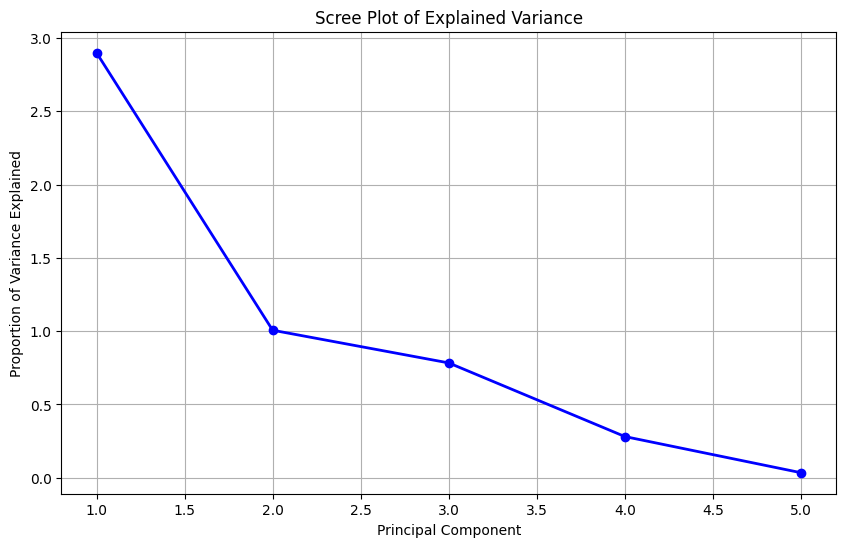

In [54]:
# Create scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance2) + 1), explained_variance2, 'bo-', linewidth=2)
plt.title('Scree Plot of Explained Variance')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.grid(True)
plt.show()


### 3.j. How does the screeplot from the uncorrelated data compare with the screeplot from the government data?

This section is answered in the report pdf file.